In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [3]:
# import World Happiness Data of 2015 - 2019
df_2015 = pd.read_csv(r'C:\Users\User\Documents\World Happiness Data\02 Data\Prepared Data\wh2015.csv', index_col = False)
df_2016 = pd.read_csv(r'C:\Users\User\Documents\World Happiness Data\02 Data\Prepared Data\wh2016.csv', index_col = False)
df_2017 = pd.read_csv(r'C:\Users\User\Documents\World Happiness Data\02 Data\Prepared Data\wh2017.csv', index_col = False)
df_2018 = pd.read_csv(r'C:\Users\User\Documents\World Happiness Data\02 Data\Prepared Data\wh2018.csv', index_col = False)
df_2019 = pd.read_csv(r'C:\Users\User\Documents\World Happiness Data\02 Data\Prepared Data\wh2019.csv', index_col = False)

In [5]:
path = r'C:\Users\User\Documents\World Happiness Data'

In [7]:
df_2015 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'wh2015.csv'))
df_2016 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'wh2016.csv'))
df_2017 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'wh2017.csv'))
df_2018 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'wh2018.csv'))
df_2019 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'wh2019.csv'))

In [9]:
# add year column in dataframe
df_2015.insert(0, "Year", [2015]*len(df_2015), True)
df_2015

,Year,Country,Rank,Score,Economy,Family,Life_Expectancy,Freedom_of_choice,Perception_of_corruption
0,2015,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978
1,2015,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145
2,2015,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357
3,2015,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503
4,2015,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957
...,...,...,...,...,...,...,...,...,...
153,2015,Rwanda,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191
154,2015,Benin,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010
155,2015,Syria,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906
156,2015,Burundi,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062


In [11]:
# add year column in dataframe
df_2016.insert(0, "Year", [2016]*len(df_2016), True)
df_2017.insert(0, "Year", [2017]*len(df_2017), True)
df_2018.insert(0, "Year", [2018]*len(df_2018), True)
df_2019.insert(0, "Year", [2019]*len(df_2019), True)

In [13]:
col_order = ['Year', 'Rank', 'Country', 'Score', 'Economy', 'Family', 'Life_Expectancy', 'Freedom_of_choice', 'Perception_of_corruption']

In [15]:
df_2017.head()

,Year,Country,Rank,Score,Economy,Family,Life_Expectancy,Freedom_of_choice,Perception_of_corruption
0,2017,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964
1,2017,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.400770
2,2017,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.153527
3,2017,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.367007
4,2017,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.382612


In [17]:
# rename columns in 2018 dataframe
df_2018_1 = df_2018.rename(columns = {'Social support' : 'Family'})

In [19]:
# rename columns in 2019 dataframe
df_2019_1 = df_2019.rename(columns = {'Social support' : 'Family'})

In [21]:
df_2016_new = df_2016[col_order]
df_2017_new = df_2017[col_order]
df_2015_new = df_2015[col_order]

In [23]:
df_2019_new = df_2019_1[col_order]
df_2018_new = df_2018_1[col_order]

In [25]:
df_2019_new.head()

,Year,Rank,Country,Score,Economy,Family,Life_Expectancy,Freedom_of_choice,Perception_of_corruption
0,2019,1,Finland,7.769,1.340,1.587,0.986,0.596,0.393
1,2019,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.410
2,2019,3,Norway,7.554,1.488,1.582,1.028,0.603,0.341
3,2019,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.118
4,2019,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.298


In [27]:
df_happiness = pd.concat([df_2015_new, df_2016_new, df_2017_new, df_2018_new, df_2019_new])

In [29]:
df_happiness.head()

,Year,Rank,Country,Score,Economy,Family,Life_Expectancy,Freedom_of_choice,Perception_of_corruption
0,2015,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978
1,2015,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145
2,2015,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357
3,2015,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503
4,2015,5,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957


In [31]:
df_happiness.tail()

,Year,Rank,Country,Score,Economy,Family,Life_Expectancy,Freedom_of_choice,Perception_of_corruption
151,2019,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.411
152,2019,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.147
153,2019,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.025
154,2019,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.035
155,2019,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.091


In [33]:
df_1 = df_happiness[["Year", "Score"]]

In [35]:
df_1.head(3)

,Year,Score
0,2015,7.587
1,2015,7.561
2,2015,7.527


In [37]:
df_3 = df_1.groupby('Year').mean()

In [39]:
type(df_3)

pandas.core.frame.DataFrame

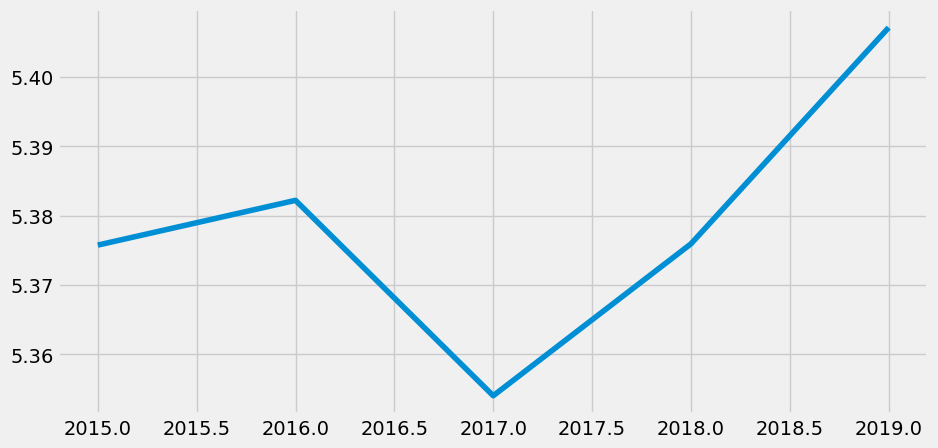

In [41]:
# Plot the data using matplotlib.

plt.figure(figsize=(10,5), dpi=100)
plt.plot(df_3)

In [59]:
df_4 = df_3.reset_index()

In [61]:
df_4['Year'] = pd.to_datetime(df_4["Year"], format='%Y')

In [63]:
df_4 = df_4.set_index('Year') # Set the datetime as the index of the dataframe.
df_4.head()

,Score
Year,
2015-01-01,5.375734
2016-01-01,5.382185
2017-01-01,5.354019
2018-01-01,5.375917
2019-01-01,5.407096


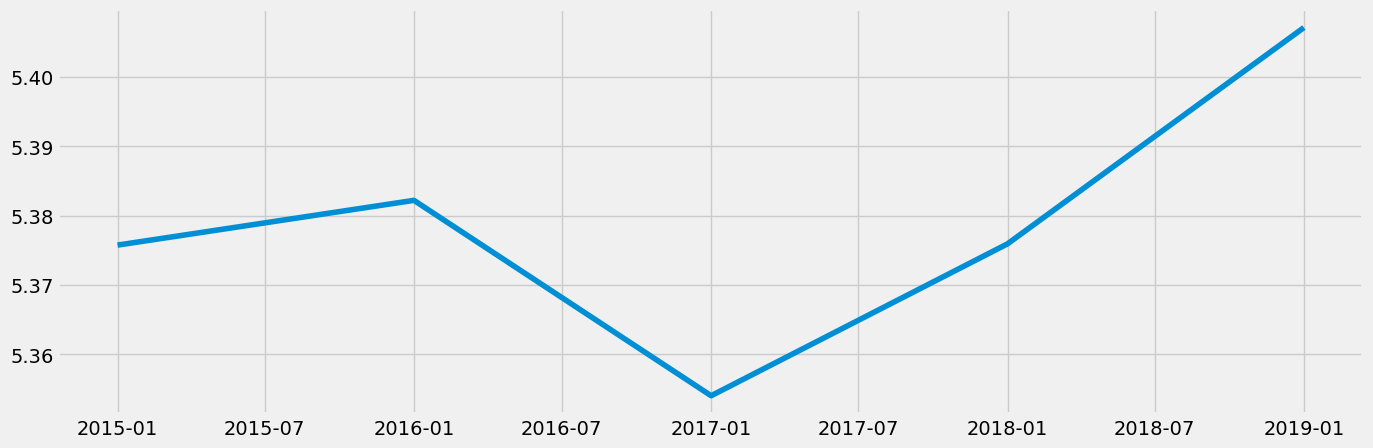

In [65]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_4)

In [67]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_4, model='additive')

In [69]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

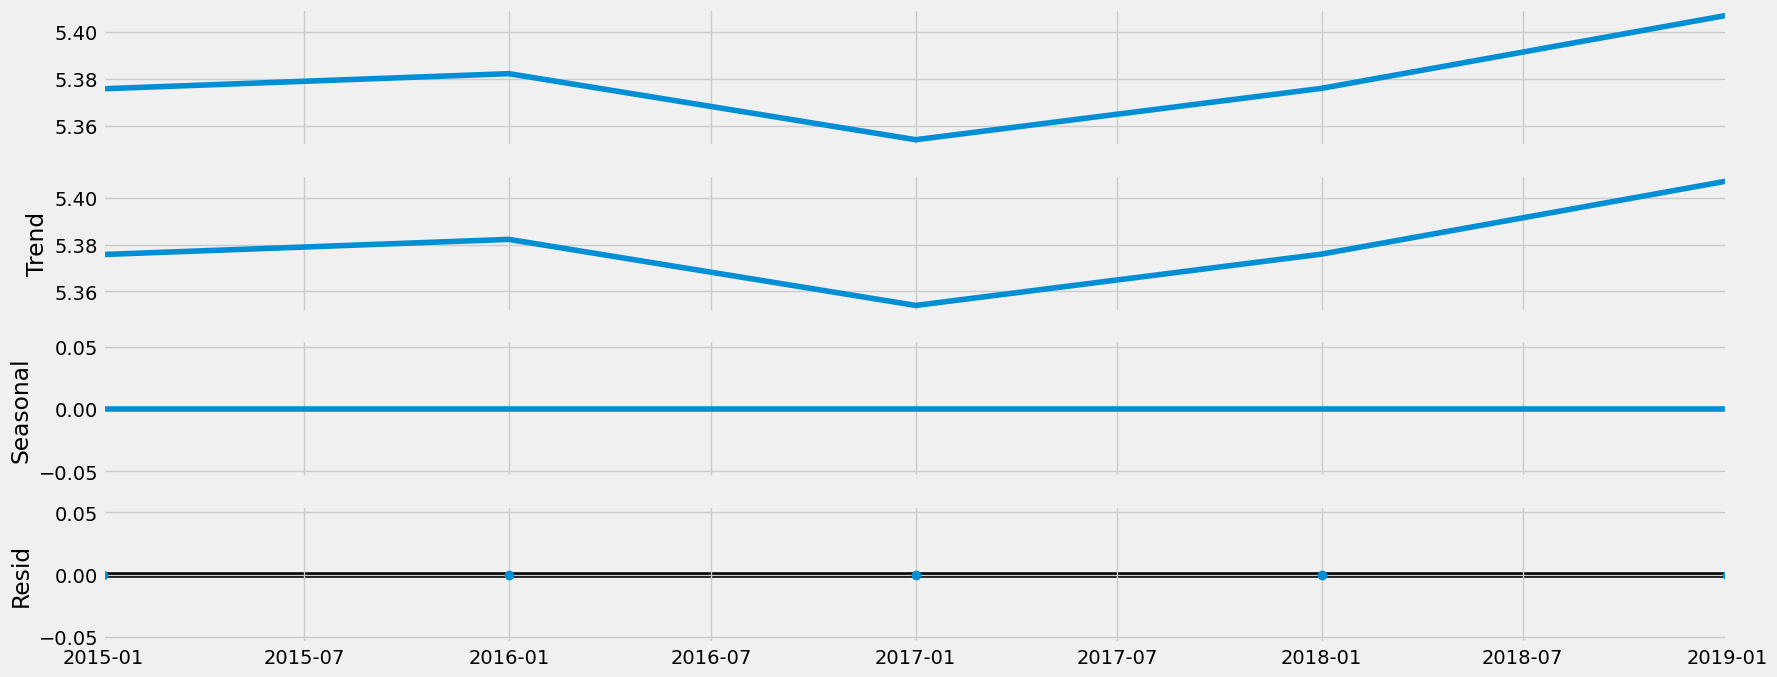

In [71]:
# Plot the separate components

decomposition.plot()
plt.show()